In [ ]:
# Import TensorFlow
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Upload dataset from excel
from google.colab import files
uploaded = files.upload()

Saving Training and Testing data.xlsx to Training and Testing data.xlsx


In [ ]:
# Read the dataset
SkinData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Skin')
FatData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Subcutaneous fat')
MuscleData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Muscle')

In [ ]:
SkinData.head()

,Skin mean thickness (mm),Skin cutting force (N)
0,1.71,53.07
1,1.72,53.12
2,1.72,53.22
3,1.73,53.30
4,1.74,53.34


In [ ]:
FatData.head()

,Fat mean thickness (mm),Subcutaneous fat cutting force (N)
0,19.05,1.80
1,19.15,1.81
2,19.17,1.83
3,19.18,1.84
4,19.25,1.86


In [ ]:
 MuscleData.head()

,Muscle mean thickness (mm),Muscle cutting force (N)
0,39.05,38.94
1,39.08,39.01
2,39.15,39.10
3,39.23,39.14
4,39.32,39.17


### Creating the data of the three tissue layers to view and fit

In [ ]:
# Here we create the x & y variables for SkinData
x1 = SkinData.drop("Skin cutting force (N)", axis = 1)
y1 = SkinData["Skin cutting force (N)"]

In [ ]:
# Here we create the x & y variables for FatData
x2 = FatData.drop("Subcutaneous fat cutting force (N)", axis = 1)
y2 = FatData["Subcutaneous fat cutting force (N)"]

In [ ]:
# Here we create the x & y variables for MuscleData
x3 = MuscleData.drop("Muscle cutting force (N)", axis = 1)
y3 = MuscleData["Muscle cutting force (N)"]

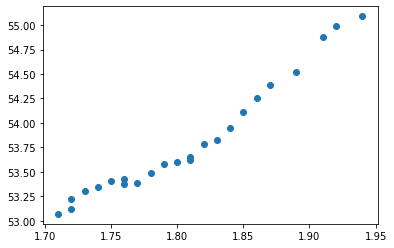

In [ ]:
plt.scatter(x1, y1);

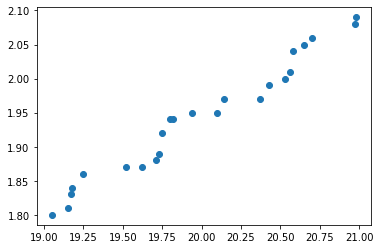

In [ ]:
plt.scatter (x2, y2);

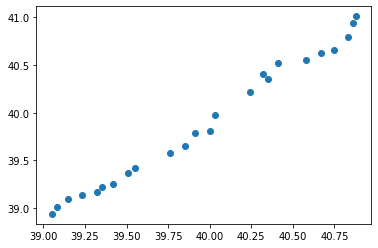

In [ ]:
plt.scatter (x3, y3);

In [ ]:
# Here, for SkinData, we create the training and test sets with a 80:20 split.
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)
len(x1), len(x1_train), len(x1_test)

(24, 19, 5)

In [ ]:
# Here, for FatData, we create the training and test sets with a 80:20 split.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

In [ ]:
# Here, for MuscleData, we create the training and test sets with a 80:20 split.
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 42)

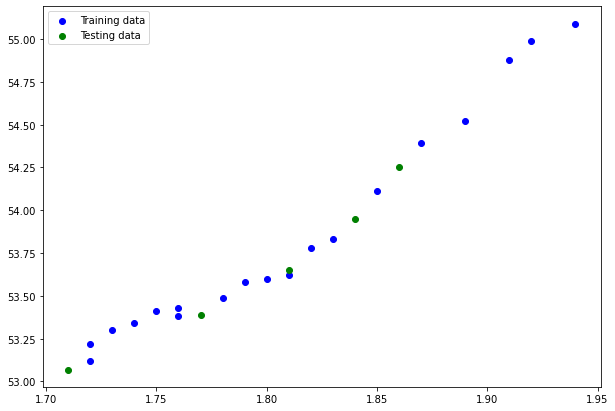

In [ ]:
# Visualizing the training and testing Skindata
plt.figure(figsize =(10, 7))

# Training daa in BLUE
plt.scatter(x1_train, y1_train, c = 'b', label = "Training data")

# Testing data in GREEN
plt.scatter(x1_test, y1_test, c = 'g', label = "Testing data")

# Legend
plt.legend();

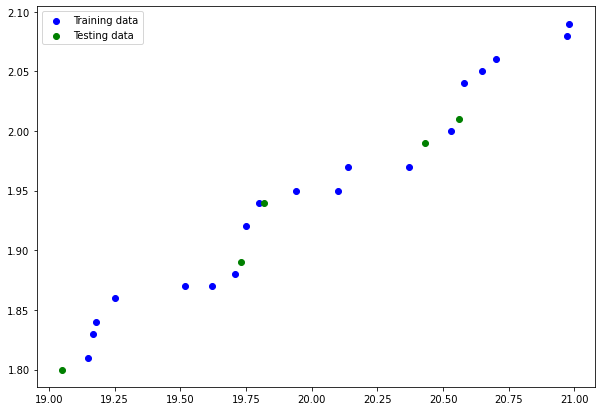

In [ ]:
# Visualizing the training and testing Fatdata
plt.figure(figsize =(10, 7))

# Training daa in BLUE
plt.scatter(x2_train, y2_train, c = 'b', label = "Training data")

# Testing data in GREEN
plt.scatter(x2_test, y2_test, c = 'g', label = "Testing data")

# Legend
plt.legend();

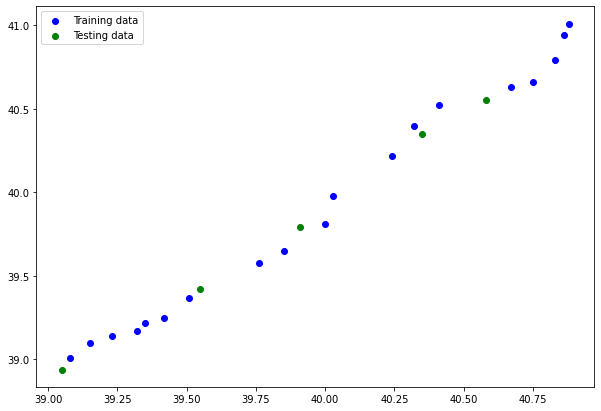

In [ ]:
# Visualizing the training and testing Muscledata
plt.figure(figsize =(10, 7))

# Training daa in BLUE
plt.scatter(x3_train, y3_train, c = 'b', label = "Training data")

# Testing data in GREEN
plt.scatter(x3_test, y3_test, c = 'g', label = "Testing data")

# Legend
plt.legend();

### TEST model

* 1 layer, epochs = 100, SGD optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
])

# 2. Compile the model
SkinData_model.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
History = SkinData_model.fit(x1_train, y1_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 283ms/step - loss: 52.8145 - mae: 52.8145
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 52.7717 - mae: 52.7717
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 52.7290 - mae: 52.7290
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 52.6862 - mae: 52.6862
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 52.6435 - mae: 52.6435
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 52.6007 - mae: 52.6007
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 52.5579 - mae: 52.5579
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 52.5152 - mae: 52.5152
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 52.4724 - mae: 52.4724
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 52.4297 - mae: 52.4297
Epoch 11/100
1/1 [==============================] - 0s 4

In [ ]:
SkinData_model.summary()

Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_170 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


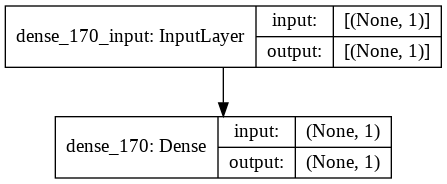

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = SkinData_model, show_shapes=True)

In [ ]:
# Let's make predictions
y_pred = SkinData_model.predict(x1_test)
y_pred

array([[5.2127094],
       [5.379314 ],
       [5.0699058],
       [5.426915 ],
       [5.307912 ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = x1_train,
                     train_labels = y1_train,
                     test_data = x1_test,
                     test_labels = y1_test,
                     predictions = y_pred):

 # Let's plot the train and test data, and compare the predictions to the ground truth labels
 plt.figure(figsize=(10,7))
 # Plot training data in BLUE
 plt.scatter(train_data, train_labels, c ='b', label = 'Training data')
 # Plot testing data in GREEN
 plt.scatter(test_data, test_labels, c = "g", label = 'Testing data')
 # Plot model's predictions in RED
 plt.scatter(test_data, predictions, c = "r", label = 'Predictions') 
 # Show the legend
 plt.legend();

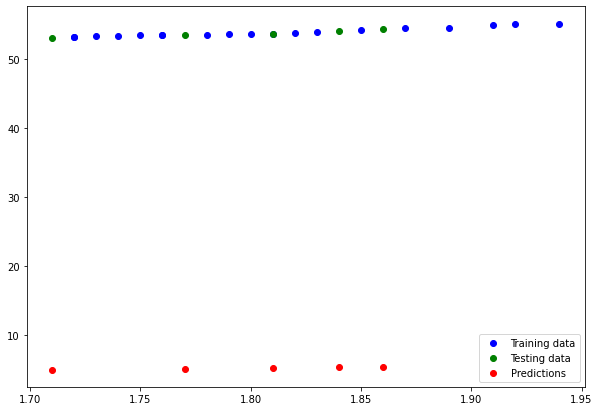

In [ ]:
 plot_predictions(train_data = x1_train,
                     train_labels = y1_train,
                     test_data = x1_test,
                     test_labels = y1_test,
                     predictions = y_pred)

### Evaluating our TEST model performance

For a *regression* problem, the two main evaluation metrics are:

* MAE - mean absolute error (on average, how wrong is each of the model's predictions).
* MSE - mean squared error (where the average errors are squared and the mean of the squares of the errors is calculated).

In [ ]:
# Let's evaluate the model on the test set
SkinData_model.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 85ms/step - loss: 48.3827 - mae: 48.3827


[48.382652282714844, 48.382652282714844]

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[5.2127094],
       [5.379314 ],
       [5.0699058],
       [5.426915 ],
       [5.307912 ]], dtype=float32)>

In [ ]:
# Let's calculate the MAE after matching the shape of y1_test to y_pred (squeeze)
mae = tf.metrics.mean_absolute_error(y_true = y1_test, 
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=48.382652>

In [ ]:
# Let's calculate the MSE (for when larger errors are more significant than smaller errors)
mse = tf.metrics.mean_squared_error(y_true = y1_test, 
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2340.9648>

In [ ]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                       y_pred = tf.squeeze(y_pred))

**Note** on TEST SkinData_model:
* The model is performing slightly better on the TEST dataset compared to the TRAINING dataset (line 200).

* The model is on average off by 48.3827.

### Let's train and test our SkinData

### SkinData_model_1

* 2 layers, epochs = 100, SGD optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = SkinData_model_1.fit(x1_train, y1_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 289ms/step - loss: 53.1739 - mae: 53.1739
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 53.0445 - mae: 53.0445
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 52.9138 - mae: 52.9138
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 52.7816 - mae: 52.7816
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 52.6478 - mae: 52.6478
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 52.5121 - mae: 52.5121
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 52.3743 - mae: 52.3743
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 52.2343 - mae: 52.2343
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 52.0916 - mae: 52.0916
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 51.9463 - mae: 51.9463
Epoch 11/100
1/1 [==============================] - 0s 7

In [ ]:
# Check the results of the model on the test dataset
SkinData_model_1.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 245ms/step - loss: 0.7087 - mae: 0.7087


[0.7086822390556335, 0.7086822390556335]

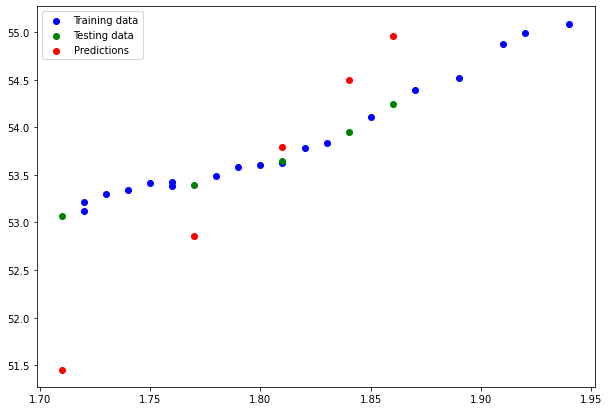

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y1_pred = SkinData_model_1.predict(x1_test)
plot_predictions(predictions = y1_pred)

In [ ]:
tf.constant(y1_pred)

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[52.85678 ],
       [54.492798],
       [51.454483],
       [54.960228],
       [53.79165 ]], dtype=float32)>

In [ ]:
tf.squeeze(y1_pred)

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([52.85678 , 54.492798, 51.454483, 54.960228, 53.79165 ],
      dtype=float32)>

In [ ]:
# model_1 evaluation metrics
mae_1 = mae(y1_test, y1_pred)
mse_1 = mse(y1_test, y1_pred)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.70868146>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.7426664>)

Note on model_1:
* Again, the model is performing better on the TEST dataset than the TRAINING dataset (line 210).

* The model is on average off by 0.6672

### SkinData model_2

* 3 layers (extra 100 hidden units), epochs = 100, SGD optimzier

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = SkinData_model_2.fit(x1_train, y1_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 329ms/step - loss: 52.9425 - mae: 52.9425
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 52.6502 - mae: 52.6502
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 52.3480 - mae: 52.3480
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 52.0330 - mae: 52.0330
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 51.7023 - mae: 51.7023
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 51.3526 - mae: 51.3526
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 50.9801 - mae: 50.9801
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 50.5808 - mae: 50.5808
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 50.1501 - mae: 50.1501
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 49.6827 - mae: 49.6827
Epoch 11/100
1/1 [==============================] - 0s 5

In [ ]:
# Check the results of the larger model on the test dataset
SkinData_model_2.evaluate(x1_test, y1_test) 

1/1 [==============================] - 1s 713ms/step - loss: 1.2515 - mae: 1.2515


[1.2514854669570923, 1.2514854669570923]

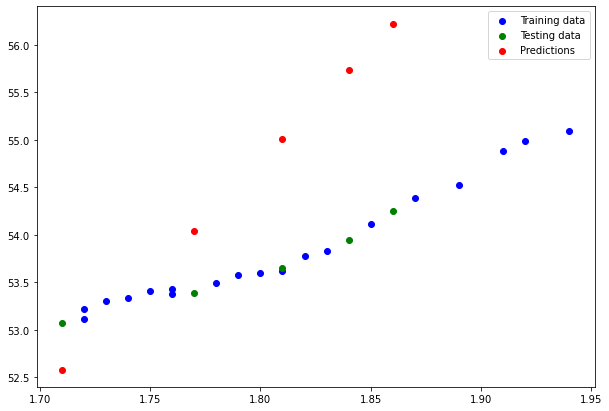

In [ ]:
# Let's visualize model_2 by making a plot of its prediction
y2_pred = SkinData_model_2.predict(x1_test)
plot_predictions(predictions=y2_pred)

In [ ]:
# model_2 evaluation metrics
mae_2 = mae(y1_test, y2_pred)
mse_2 = mse(y1_test, y2_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.2514846>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.9199651>)

**Note on model_3:**
* Again, the model is performing slightly better on the TEST dataset than the TRAINING dataset (line 102).

* The model is on average off by 27.2017

* The extra 100 hidden layers decreased effectiveness of the model (possibly too complex).

### SkinData model_3

* 2 layers, Adam optimizer (lr = 0.04), epochs = 100

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = SkinData_model_3.fit(x1_train, y1_train, epochs = 100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 360ms/step - loss: 53.1739 - mae: 53.1739
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 52.4801 - mae: 52.4801
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 51.7520 - mae: 51.7520
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 50.9865 - mae: 50.9865
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 50.1754 - mae: 50.1754
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 49.3097 - mae: 49.3097
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 48.3817 - mae: 48.3817
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 47.3841 - mae: 47.3841
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 46.3101 - mae: 46.3101
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 45.1541 - mae: 45.1541
Epoch 11/100
1/1 [==============================] - 0s 5m

In [ ]:
# Let's check the results of the smaller model on the test dataset
SkinData_model_3.evaluate(x1_test, y1_test) 

1/1 [==============================] - 0s 110ms/step - loss: 0.5574 - mae: 0.5574


[0.5573676824569702, 0.5573676824569702]

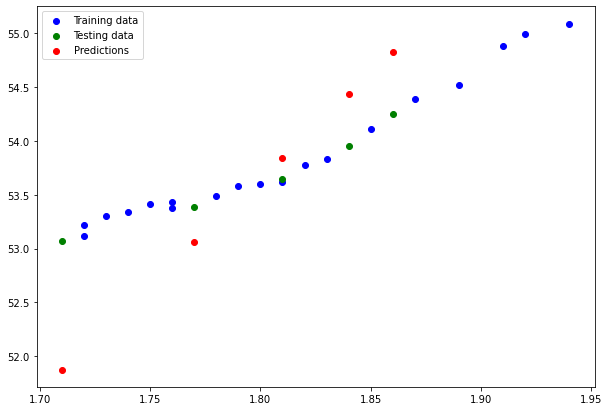

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y3_pred = SkinData_model_3.predict(x1_test)
plot_predictions(predictions=y3_pred)

Text(0.5, 0, 'epochs')

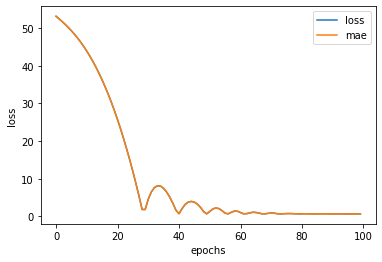

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_3 evaluation metrics
mae_3 = mae(y1_test, y3_pred)
mse_3 = mse(y1_test, y3_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.5573662>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.42918497>)

**Note on model_3:**
* The decrease in complexity of the model lead to a decrease in loss/mae.

* The implementation of the Adam optimizer at a lr = 0.02 enhanced the models effectiveness.

* Compared to model_1 (loss: 0.7087 - mae: 0.7087), model_3 showed a 27% decrease in loss and mae.

### SkinData model_4

* 2 layers, Adam optimizer (lr = 0.04), epochs = 600

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = SkinData_model_4.fit(x1_train, y1_train, epochs = 600)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/600
1/1 [==============================] - 0s 348ms/step - loss: 53.1739 - mae: 53.1739
Epoch 2/600
1/1 [==============================] - 0s 11ms/step - loss: 52.4801 - mae: 52.4801
Epoch 3/600
1/1 [==============================] - 0s 6ms/step - loss: 51.7520 - mae: 51.7520
Epoch 4/600
1/1 [==============================] - 0s 4ms/step - loss: 50.9865 - mae: 50.9865
Epoch 5/600
1/1 [==============================] - 0s 6ms/step - loss: 50.1754 - mae: 50.1754
Epoch 6/600
1/1 [==============================] - 0s 3ms/step - loss: 49.3097 - mae: 49.3097
Epoch 7/600
1/1 [==============================] - 0s 4ms/step - loss: 48.3817 - mae: 48.3817
Epoch 8/600
1/1 [==============================] - 0s 5ms/step - loss: 47.3841 - mae: 47.3841
Epoch 9/600
1/1 [==============================] - 0s 5ms/step - loss: 46.3101 - mae: 46.3101
Epoch 10/600
1/1 [==============================] - 0s 5ms/step - loss: 45.1541 - mae: 45.1541
Epoch 11/600
1/1 [==============================] - 0s 5

In [ ]:
# Let's check the results of the model on the test dataset
SkinData_model_4.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 246ms/step - loss: 0.1715 - mae: 0.1715


[0.17145004868507385, 0.17145004868507385]

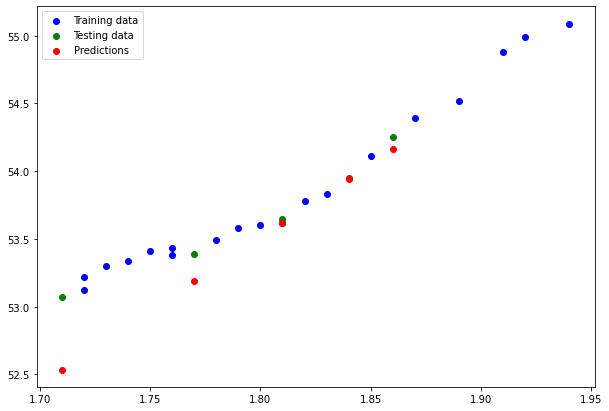

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y4_pred = SkinData_model_4.predict(x1_test)
plot_predictions(predictions=y4_pred)

Text(0.5, 0, 'epochs')

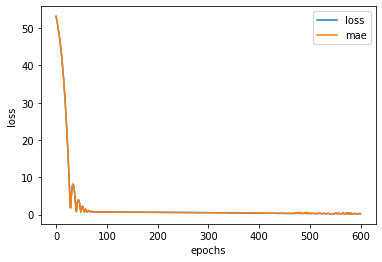

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_4 evaluation metrics
mae_4 = mae(y1_test, y4_pred)
mse_4 = mse(y1_test, y4_pred)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.17144851>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.06696583>)

**Note on model_4:**

* The lr of 0.04 was found to be most optimal for reducing loss.

* The higher epochs led to a decrease in loss aswell.

### SkinData model_5

* 2 layers, Adam optimizer (lr = 0.018), epochs = 2000, patience = 42

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_5 = tf.keras.Sequential([                                                                               
  tf.keras.layers.Dense(10),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.018),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 42)
history = SkinData_model_5.fit(x1_train, y1_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 0s 354ms/step - loss: 53.1739 - mae: 53.1739
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 52.8662 - mae: 52.8662
Epoch 3/2000
1/1 [==============================] - 0s 5ms/step - loss: 52.5512 - mae: 52.5512
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 52.2289 - mae: 52.2289
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 51.8989 - mae: 51.8989
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 51.5608 - mae: 51.5608
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 51.2136 - mae: 51.2136
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 50.8562 - mae: 50.8562
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 50.4874 - mae: 50.4874
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 50.1061 - mae: 50.1061
Epoch 11/2000
1/1 [============================

In [ ]:
# Let's check the results of the model on the test dataset
SkinData_model_5.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 227ms/step - loss: 0.0846 - mae: 0.0846


[0.08456115424633026, 0.08456115424633026]

In [ ]:
# Compared against test dataset:
# lr = 0.01, loss: 0.1228 
# lr = 0.018, loss: 0.0846 (patience = 42, epochs = 1516)
# lr = 0.02, loss = 0.1052 (patience = 40), loss = 0.0956 (patience = 50, epochs = 1463), loss = 0.0893 (patience = 49, epochs = 1462), loss = 0.0882 (patience = 42, epochs = 1455)
# lr = 0.03, loss = 0.2876
# lr = 0.04, loss = 0.3313

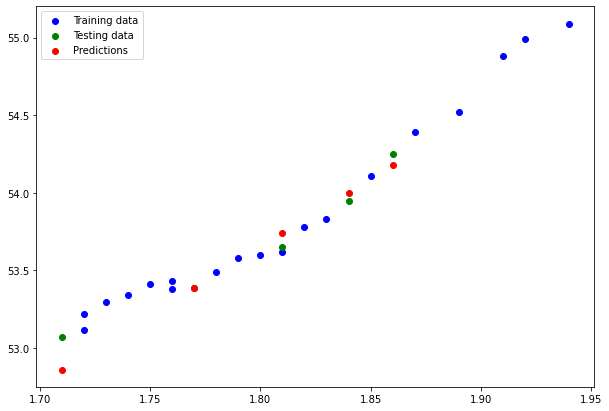

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y5_pred = SkinData_model_5.predict(x1_test)
plot_predictions(predictions=y5_pred)

Text(0.5, 0, 'epochs')

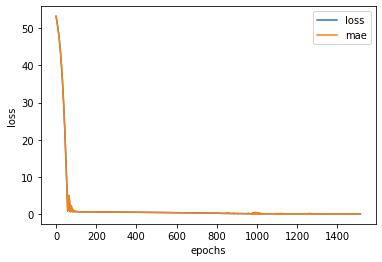

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_5 evaluation metrics
mae_5 = mae(y1_test, y5_pred)
mse_5 = mse(y1_test, y5_pred)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.08456192>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.011792467>)

**Note on model_5:**

* The increase in epochs lead to a decrease in the model's loss. However, the EarlyStopping callback component was added, which improved the model's prediction (reduced loss when compared to the test data) as it stopped training once the desired metric stopped improving.

* lr = 0.02, at epoch = 2000 was found to be most effective at reducing loss.

# SkinData model_6

* 2 layers, Adam optimizer (lr = 0.008), epochs = 3000, activation = "relu"

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
SkinData_model_6 = tf.keras.Sequential([    
  tf.keras.layers.Dense(10, activation="relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
SkinData_model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = SkinData_model_6.fit(x1_train, y1_train, epochs = 3000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Streaming output truncated to the last 5000 lines.
Epoch 303/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6573 - mae: 0.6573
Epoch 304/3000
1/1 [==============================] - 0s 16ms/step - loss: 0.6572 - mae: 0.6572
Epoch 305/3000
1/1 [==============================] - 0s 5ms/step - loss: 0.6571 - mae: 0.6571
Epoch 306/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6569 - mae: 0.6569
Epoch 307/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.6568 - mae: 0.6568
Epoch 308/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6566 - mae: 0.6566
Epoch 309/3000
1/1 [==============================] - 0s 17ms/step - loss: 0.6565 - mae: 0.6565
Epoch 310/3000
1/1 [==============================] - 0s 4ms/step - loss: 0.6565 - mae: 0.6565
Epoch 311/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.6564 - mae: 0.6564
Epoch 312/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6562 - mae: 0.6

In [ ]:
# Let's check the results of the model on the test dataset
SkinData_model_6.evaluate(x1_test, y1_test)

1/1 [==============================] - 0s 299ms/step - loss: 0.1193 - mae: 0.1193


[0.1193084716796875, 0.1193084716796875]

In [ ]:
# activation = None:

# lr = 0.008, loss: 1143 (epochs = 2436, patience = 50)
# lr = 0.008, loss: 0.1010 (epochs = 2168, patience = 40)
# lr = 0.005, loss: (epochs = 2267, patience = 50)

# activation = "relu":

# lr = 0.008, loss: 0.1193 (epochs = 2802, patience = 40)

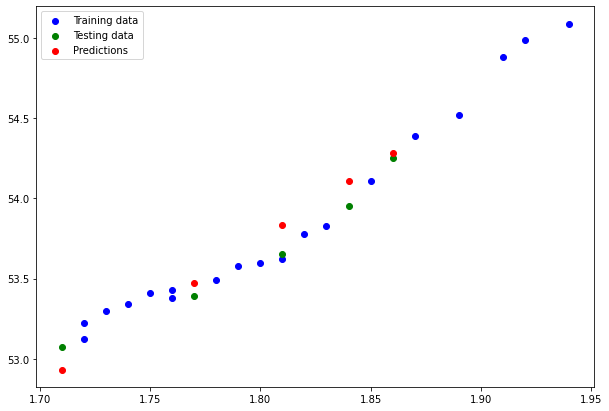

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y6_pred = SkinData_model_6.predict(x1_test)
plot_predictions(predictions=y6_pred)

In [ ]:
# model_6 evaluation metrics
mae_6 = mae(y1_test, y6_pred)
mse_6 = mse(y1_test, y6_pred)
mae_6, mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=0.11931>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.017063662>)

**Note on model_6:**

* Decreasing the learning rate led to a more inaccurate model.

* The addition of the activation function (both "relu" and None) led to an increase in loss.

### Comparing the model's results using a panda DataFrame

In [ ]:
# Here we compare the results from our 6 models using a pandas DataFrame
import pandas as pd

model_results = [["SkinData_model_1", mae_1.numpy(), mse_1.numpy()],
                 ["SkinData_model_2", mae_2.numpy(), mse_2.numpy()],
                 ["SkinData_model_3", mae_3.numpy(), mse_3.numpy()],
                 ["SkinData_model_4", mae_4.numpy(), mse_4.numpy()],
                 ["SkinData_model_5", mae_5.numpy(), mse_5.numpy()],
                 ["SkinData_model_6", mae_6.numpy(), mse_6.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,SkinData_model_1,0.708681,0.742666
1,SkinData_model_2,1.251485,1.919965
2,SkinData_model_3,0.557366,0.429185
3,SkinData_model_4,0.171449,0.066966
4,SkinData_model_5,0.084562,0.011792
5,SkinData_model_6,0.119310,0.017064


In [ ]:
# SkinData_model 5 is the most effective model as its mae and mse are the lowest

### **Let's train and test FatData**


### TEST model

* 1 layer, epochs = 100, SGD optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_test = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_test.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_test.fit(x2_train, y2_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 373ms/step - loss: 9.4582 - mae: 9.4582
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 5.4459 - mae: 5.4459
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.4336 - mae: 1.4336
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 2.5788 - mae: 2.5788
Epoch 5/100
1/1 [==============================] - 0s 21ms/step - loss: 1.4336 - mae: 1.4336
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 2.5788 - mae: 2.5788
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 1.4336 - mae: 1.4336
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 2.5788 - mae: 2.5788
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 1.4336 - mae: 1.4336
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 2.5788 - mae: 2.5788
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 1.4

In [ ]:
# Check the results of the model on the test dataset
FatData_model_test.evaluate(x2_test, y2_test)

1/1 [==============================] - 0s 145ms/step - loss: 1.4389 - mae: 1.4389


[1.4389415979385376, 1.4389415979385376]

In [ ]:
FatData_model_test.summary()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_184 (Dense)            (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's make predictions
y_pred = FatData_model_test.predict(x2_test)
y_pred

array([[3.332992 ],
       [3.451953 ],
       [3.2174304],
       [3.4740455],
       [3.348287 ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = x2_train,
                     train_labels = y2_train,
                     test_data = x2_test,
                     test_labels = y2_test,
                     predictions = y_pred):

 # Let's plot the train and test data, and compare the predictions to the ground truth labels
 plt.figure(figsize=(10,7))
 # Plot training data in BLUE
 plt.scatter(train_data, train_labels, c ='b', label = 'Training data')
 # Plot testing data in GREEN
 plt.scatter(test_data, test_labels, c = "g", label = 'Testing data')
 # Plot model's predictions in RED
 plt.scatter(test_data, predictions, c = "r", label = 'Predictions') 
 # Show the legend
 plt.legend();

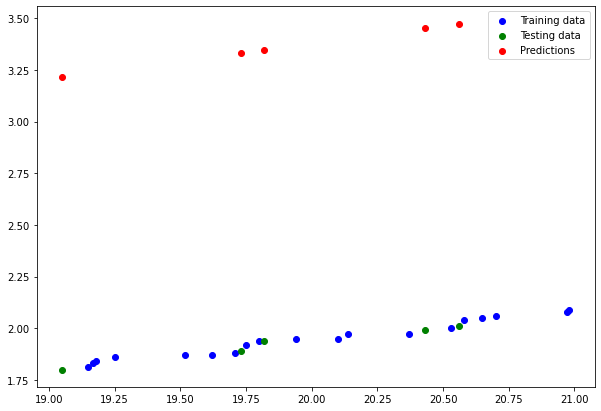

In [ ]:
plot_predictions(train_data = x2_train,
                 train_labels = y2_train,
                 test_data = x2_test,
                 test_labels = y2_test,
                 predictions = y_pred)

In [ ]:
# Let's calculate the MAE after matching the shape of y1_test to y_pred (squeeze)
mae = tf.metrics.mean_absolute_error(y_true = y2_test, 
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.4389416>

In [ ]:
# Let's calculate the MSE (for when larger errors are more significant than smaller errors)
mse = tf.metrics.mean_squared_error(y_true = y2_test, 
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=2.0710688>

In [ ]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y2_test, 
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y2_test, 
                                       y_pred = tf.squeeze(y_pred))

### **FatData_model_1**

* 2 layers, epochs = 100, SGD optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_1.fit(x2_train, y2_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 502ms/step - loss: 5.4854 - mae: 5.4854
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7296 - mae: 6.7296
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 4.9010 - mae: 4.9010
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 6.3543 - mae: 6.3543
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 4.3625 - mae: 4.3625
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 6.0084 - mae: 6.0084
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 3.8664 - mae: 3.8664
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 5.6898 - mae: 5.6898
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 3.4093 - mae: 3.4093
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 5.3962 - mae: 5.3962
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss: 2.9

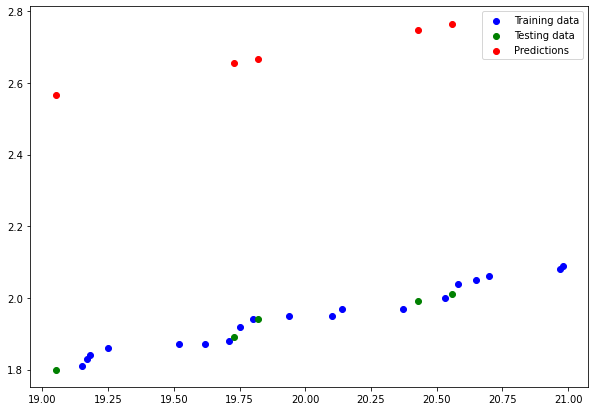

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y1_pred = FatData_model_1.predict(x2_test)
plot_predictions(predictions = y1_pred)

In [ ]:
# model_1 evaluation metrics
mae_1 = mae(y2_test, y1_pred)
mse_1 = mse(y2_test, y1_pred)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=0.75457203>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5695765>)

### FatData model_2

* 3 layers (extra 100 hidden units), epochs = 100, SGD optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_2.fit(x2_train, y2_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 487ms/step - loss: 8.0440 - mae: 8.0440
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 17.6297 - mae: 17.6297
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 4.1507 - mae: 4.1507
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 12.0492 - mae: 12.0492
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 2.1343 - mae: 2.1343
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 8.9728 - mae: 8.9728
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 0.9483 - mae: 0.9483
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 7.0835 - mae: 7.0835
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 0.1912 - mae: 0.1912
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 5.8363 - mae: 5.8363
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - lo

In [ ]:
# Check the results of the larger model on the test dataset
FatData_model_2.evaluate(x2_test, y2_test) 

1/1 [==============================] - 0s 142ms/step - loss: 0.7045 - mae: 0.7045


[0.7045076489448547, 0.7045076489448547]

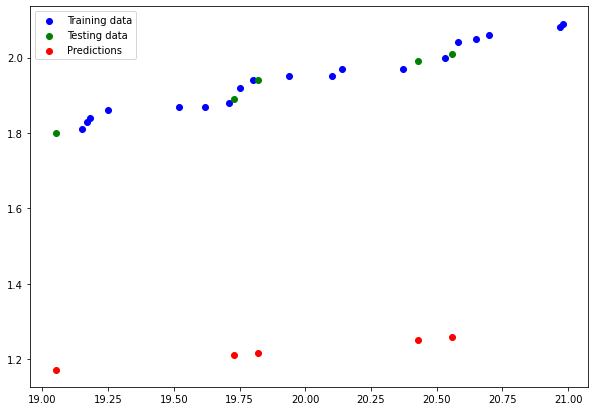

In [ ]:
# Let's visualize model_2 by making a plot of its prediction
y2_pred = FatData_model_2.predict(x2_test)
plot_predictions(predictions = y2_pred)

In [ ]:
# model_2 evaluation metrics
mae_2 = mae(y2_test, y2_pred)
mse_2 = mse(y2_test, y2_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.7045077>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.49842995>)

Text(0.5, 0, 'epochs')

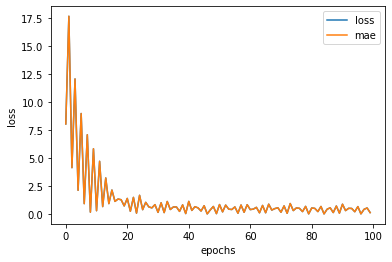

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### FatData model_3

* 2 layers, Adam optimizer (lr = 0.04), epochs = 500

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_3.fit(x2_train, y2_train, epochs = 100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 485ms/step - loss: 5.4854 - mae: 5.4854
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0290 - mae: 0.0290
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.5090 - mae: 1.5090
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 0.1500 - mae: 0.1500
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 2.4661 - mae: 2.4661
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 2.9777 - mae: 2.9777
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 2.1657 - mae: 2.1657
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.4974 - mae: 0.4974
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 1.7362 - mae: 1.7362
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 2.7402 - mae: 2.7402
Epoch 11/100
1/1 [==============================] - 0s 8ms/step - loss: 2.8

In [ ]:
# Let's check the results of the smaller model on the test dataset
FatData_model_3.evaluate(x2_test, y2_test) 

1/1 [==============================] - 0s 432ms/step - loss: 0.7187 - mae: 0.7187


[0.7187490463256836, 0.7187490463256836]

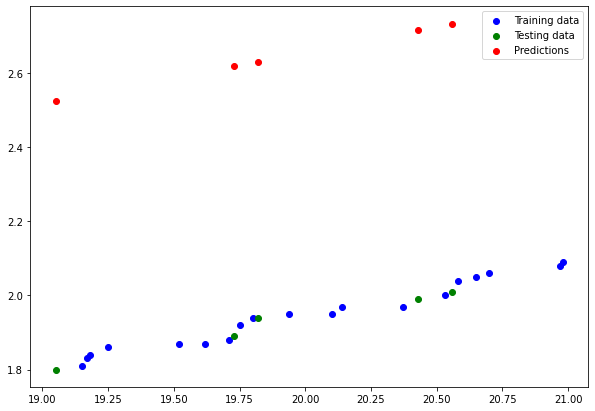

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y3_pred = FatData_model_3.predict(x2_test)
plot_predictions(predictions = y3_pred)

Text(0.5, 0, 'epochs')

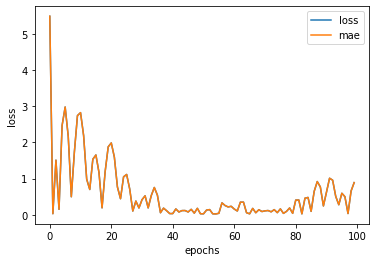

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_3 evaluation metrics
mae_3 = mae(y2_test, y3_pred)
mse_3 = mse(y2_test, y3_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.7187489>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.5167939>)

### FatData model_4

* 2 layers, Adam optimizer (lr = 0.04), epochs = 600

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = FatData_model_4.fit(x2_train, y2_train, epochs = 600)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/600
1/1 [==============================] - 1s 544ms/step - loss: 5.4854 - mae: 5.4854
Epoch 2/600
1/1 [==============================] - 0s 11ms/step - loss: 0.0290 - mae: 0.0290
Epoch 3/600
1/1 [==============================] - 0s 8ms/step - loss: 1.5090 - mae: 1.5090
Epoch 4/600
1/1 [==============================] - 0s 8ms/step - loss: 0.1500 - mae: 0.1500
Epoch 5/600
1/1 [==============================] - 0s 5ms/step - loss: 2.4661 - mae: 2.4661
Epoch 6/600
1/1 [==============================] - 0s 4ms/step - loss: 2.9777 - mae: 2.9777
Epoch 7/600
1/1 [==============================] - 0s 10ms/step - loss: 2.1657 - mae: 2.1657
Epoch 8/600
1/1 [==============================] - 0s 4ms/step - loss: 0.4974 - mae: 0.4974
Epoch 9/600
1/1 [==============================] - 0s 4ms/step - loss: 1.7362 - mae: 1.7362
Epoch 10/600
1/1 [==============================] - 0s 6ms/step - loss: 2.7402 - mae: 2.7402
Epoch 11/600
1/1 [==============================] - 0s 20ms/step - loss: 2.

In [ ]:
# Let's check the results of the model on the test dataset
FatData_model_4.evaluate(x2_test, y2_test)

1/1 [==============================] - 0s 152ms/step - loss: 0.1463 - mae: 0.1463


[0.1462719887495041, 0.1462719887495041]

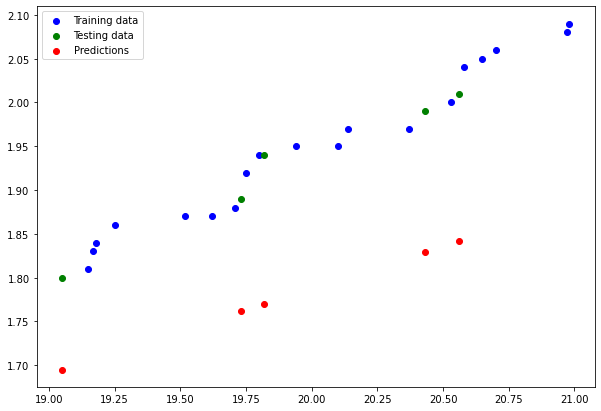

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y4_pred = FatData_model_4.predict(x2_test)
plot_predictions(predictions = y4_pred)

In [ ]:
# model_4 evaluation metrics
mae_4 = mae(y2_test, y4_pred)
mse_4 = mse(y2_test, y4_pred)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.1462721>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.022045257>)

Text(0.5, 0, 'epochs')

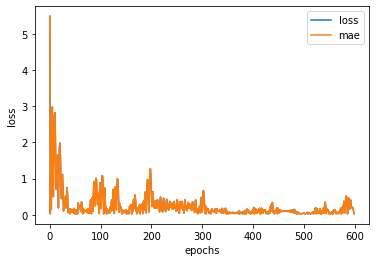

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### FatData model_5

* 2 layers, Adam optimizer (lr = 0.018), epochs = 2000, patience = 42

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_5 = tf.keras.Sequential([                                                                               
  tf.keras.layers.Dense(10),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.018),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 42)
history = FatData_model_5.fit(x2_train, y2_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 530ms/step - loss: 5.4854 - mae: 5.4854
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 2.9733 - mae: 2.9733
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5167 - mae: 0.5167
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.8929 - mae: 1.8929
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.8964 - mae: 2.8964
Epoch 6/2000
1/1 [==============================] - 0s 16ms/step - loss: 3.0783 - mae: 3.0783
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 2.7267 - mae: 2.7267
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 2.0025 - mae: 2.0025
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.0025 - mae: 1.0025
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.2124 - mae: 0.2124
Epoch 11/2000
1/1 [==============================] - 0s 5ms/ste

In [ ]:
# Let's check the results of the model on the test dataset
FatData_model_5.evaluate(x2_test, y2_test)

1/1 [==============================] - 0s 235ms/step - loss: 0.0861 - mae: 0.0861


[0.08612630516290665, 0.08612630516290665]

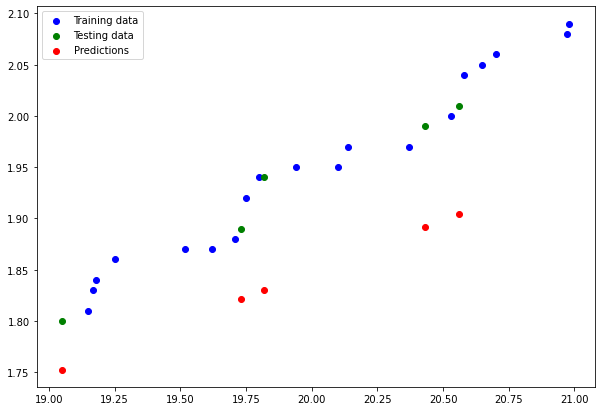

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y5_pred = FatData_model_5.predict(x2_test)
plot_predictions(predictions = y5_pred)

In [ ]:
# model_5 evaluation metrics
mae_5 = mae(y2_test, y5_pred)
mse_5 = mse(y2_test, y5_pred)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.08612649>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.007999005>)

Text(0.5, 0, 'epochs')

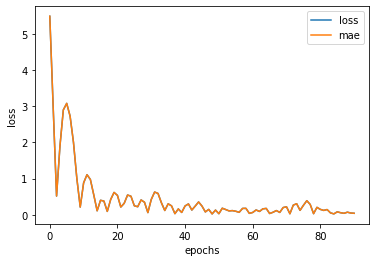

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### FatData model_6

* 2 layers, Adam optimizer (lr = 0.008), epochs = 2000, activation = "relu"


In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
FatData_model_6 = tf.keras.Sequential([                                         
  tf.keras.layers.Dense(10, activation= "relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
FatData_model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = FatData_model_6.fit(x2_train, y2_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 0s 491ms/step - loss: 11.3034 - mae: 11.3034
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 10.7565 - mae: 10.7565
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 10.2207 - mae: 10.2207
Epoch 4/2000
1/1 [==============================] - 0s 14ms/step - loss: 9.6962 - mae: 9.6962
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 9.1830 - mae: 9.1830
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 8.6814 - mae: 8.6814
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 8.1915 - mae: 8.1915
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 7.7134 - mae: 7.7134
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.2473 - mae: 7.2473
Epoch 10/2000
1/1 [==============================] - 0s 12ms/step - loss: 6.7931 - mae: 6.7931
Epoch 11/2000
1/1 [==============================] - 0s 7

In [ ]:
# Let's check the results of the model on the test dataset
FatData_model_6.evaluate(x2_test, y2_test)

1/1 [==============================] - 0s 243ms/step - loss: 0.0168 - mae: 0.0168


[0.016775822266936302, 0.016775822266936302]

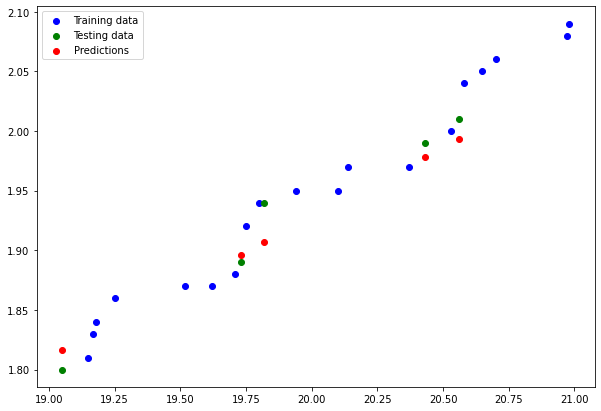

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y6_pred = FatData_model_6.predict(x2_test)
plot_predictions(predictions = y6_pred)

In [ ]:
# model_6 evaluation metrics
mae_6 = mae(y2_test, y6_pred)
mse_6 = mse(y2_test, y6_pred)
mae_6, mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=0.016775822>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.00036258996>)

Text(0.5, 0, 'epochs')

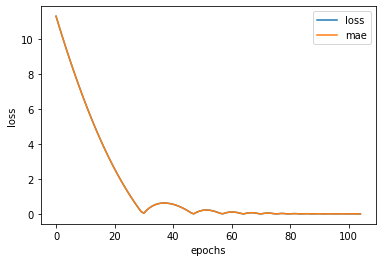

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Comparing the FatData model's result using a panda DataFrame


In [ ]:
# Here we compare the results from our 6 models using a pandas DataFrame
import pandas as pd

model_results = [["FatData_model_1", mae_1.numpy(), mse_1.numpy()],
                 ["FatData_model_2", mae_2.numpy(), mse_2.numpy()],
                 ["FatData_model_3", mae_3.numpy(), mse_3.numpy()],
                 ["FatData_model_4", mae_4.numpy(), mse_4.numpy()],
                 ["FatData_model_5", mae_5.numpy(), mse_5.numpy()],
                 ["FatData_model_6", mae_6.numpy(), mse_6.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,FatData_model_1,0.754572,0.569577
1,FatData_model_2,0.704508,0.498430
2,FatData_model_3,0.718749,0.516794
3,FatData_model_4,0.146272,0.022045
4,FatData_model_5,0.086126,0.007999
5,FatData_model_6,0.016776,0.000363


In [ ]:
# FatData_model_6 is the most effective model as its mae and mse are the lowest.

### TEST model for MuscleData

* 1 layer, epochs = 100, SGD optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_test = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_test.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_test.fit(x3_train, y3_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 438ms/step - loss: 17.1262 - mae: 17.1262
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 1.1305 - mae: 1.1305
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 14.8651 - mae: 14.8651
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1305 - mae: 1.1305
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 14.8651 - mae: 14.8651
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 1.1305 - mae: 1.1305
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 14.8651 - mae: 14.8651
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1305 - mae: 1.1305
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 14.8651 - mae: 14.8651
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 1.1305 - mae: 1.1305
Epoch 11/100
1/1 [==============================] - 0s 17ms/step 

In [ ]:
# Checking the results of the model on the TEST dataset
MuscleData_model_test.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 125ms/step - loss: 14.8447 - mae: 14.8447


[14.844677925109863, 14.844677925109863]

In [ ]:
# Let's make predictions
y_pred = MuscleData_model_test.predict(x3_test)
y_pred

array([[54.19172 ],
       [55.28748 ],
       [53.506866],
       [55.602512],
       [54.68481 ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = x3_train,
                     train_labels = y3_train,
                     test_data = x3_test,
                     test_labels = y3_test,
                     predictions = y_pred):

 # Let's plot the train and test data, and compare the predictions to the ground truth labels
 plt.figure(figsize=(10,7))
 # Plot training data in BLUE
 plt.scatter(train_data, train_labels, c ='b', label = 'Training data')
 # Plot testing data in GREEN
 plt.scatter(test_data, test_labels, c = "g", label = 'Testing data')
 # Plot model's predictions in RED
 plt.scatter(test_data, predictions, c = "r", label = 'Predictions') 
 # Show the legend
 plt.legend();

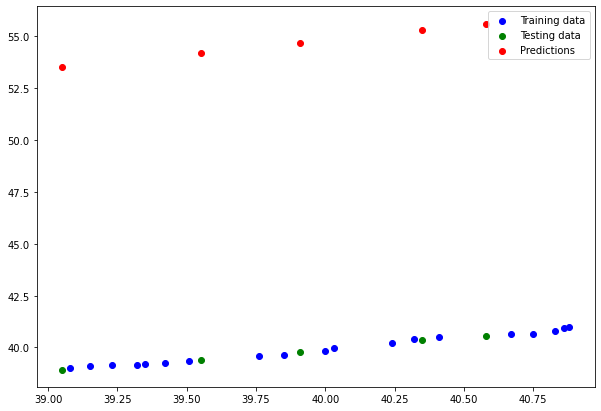

In [ ]:
plot_predictions(train_data = x3_train,
                 train_labels = y3_train,
                 test_data = x3_test,
                 test_labels = y3_test,
                 predictions = y_pred)

In [ ]:
# Let's calculate the MAE after matching the shape of y3_test to y_pred (squeeze)
mae = tf.metrics.mean_absolute_error(y_true = y3_test, 
                                     y_pred = tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=14.844678>

In [ ]:
# Let's calculate the MSE (for when larger errors are more significant than smaller errors)
mse = tf.metrics.mean_squared_error(y_true = y3_test, 
                                     y_pred = tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=220.39185>

In [ ]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y3_test, 
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y3_test, 
                                       y_pred = tf.squeeze(y_pred))

### MuscleData_model_1

* 2 Layers, epochs = 100, SGD optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_1.fit(x3_train, y3_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 457ms/step - loss: 25.0660 - mae: 25.0660
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 27.2080 - mae: 27.2080
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 29.4375 - mae: 29.4375
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 7.4538 - mae: 7.4538
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 32.5223 - mae: 32.5223
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 6.4862 - mae: 6.4862
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 32.4190 - mae: 32.4190
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 16.3233 - mae: 16.3233
Epoch 9/100
1/1 [==============================] - 0s 22ms/step - loss: 11.1340 - mae: 11.1340
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 23.2650 - mae: 23.2650
Epoch 11/100
1/1 [==============================] - 0s 10

In [ ]:
# Check the results of the model on the test dataset
MuscleData_model_1.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 306ms/step - loss: 0.5096 - mae: 0.5096


[0.5095962285995483, 0.5095962285995483]

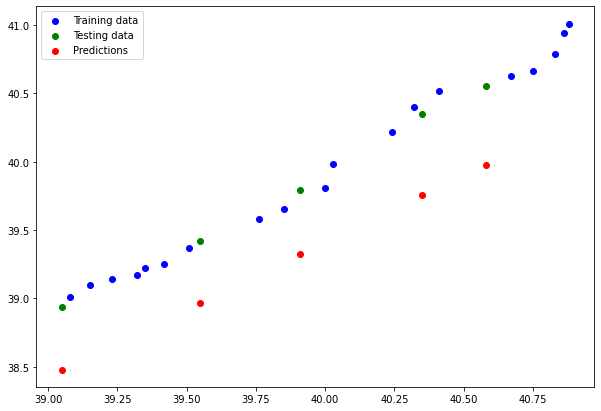

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y1_pred = MuscleData_model_1.predict(x3_test)
plot_predictions(predictions = y1_pred)

Text(0.5, 0, 'epochs')

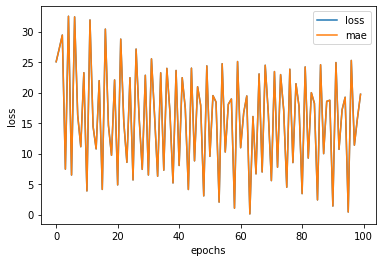

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_2 evaluation metrics
mae_2 = mae(y3_test, y1_pred)
mse_2 = mse(y3_test, y1_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=0.5095962>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.26348084>)

### MuscleData_model_2

* 3 Layers (extra 100 hidden units), epochs = 100, SGD optimizer

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_2.fit(x3_train, y3_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 536ms/step - loss: 19.9525 - mae: 19.9525
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 110.3907 - mae: 110.3907
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 39.5751 - mae: 39.5751
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 33.0726 - mae: 33.0726
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 22.1844 - mae: 22.1844
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 6.1906 - mae: 6.1906
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 33.7083 - mae: 33.7083
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 26.0101 - mae: 26.0101
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 6.6128 - mae: 6.6128
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 52.3851 - mae: 52.3851
Epoch 11/100
1/1 [==============================] - 0s 5ms

In [ ]:
# Let's check the results of the larger model on the test dataset
MuscleData_model_2.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 268ms/step - loss: 2.4654 - mae: 2.4654


[2.465399980545044, 2.465399980545044]

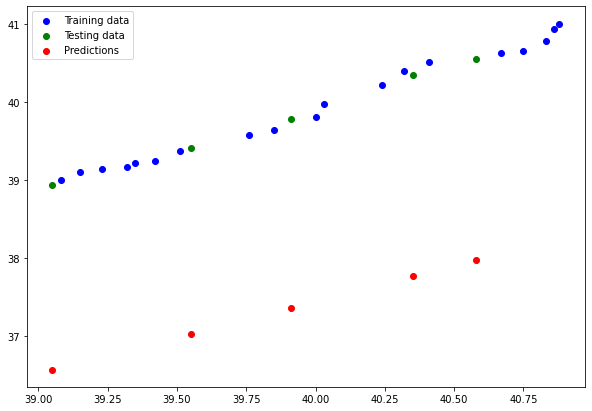

In [ ]:
# Let's visualize model_2 by making a plot of its prediction
y2_pred = MuscleData_model_2.predict(x3_test)
plot_predictions(predictions = y2_pred)

Text(0.5, 0, 'epochs')

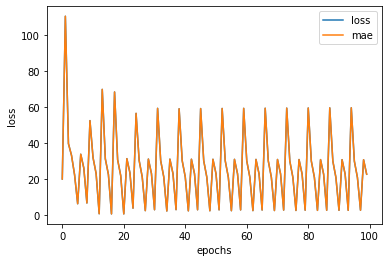

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_2 evaluation metrics
mae_2 = mae(y3_test, y2_pred)
mse_2 = mse(y3_test, y2_pred)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.4653993>,
 <tf.Tensor: shape=(), dtype=float32, numpy=6.0864544>)

### MuscleData_model_3

* 2 Layers, Adam optimizer (lr = 0.04), epochs = 500

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_3.fit(x3_train, y3_train, epochs = 100)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 1s 502ms/step - loss: 25.0660 - mae: 25.0660
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 13.7077 - mae: 13.7077
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 1.8429 - mae: 1.8429
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5735 - mae: 10.5735
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 15.1622 - mae: 15.1622
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 15.1360 - mae: 15.1360
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 12.2960 - mae: 12.2960
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 7.7177 - mae: 7.7177
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 2.0828 - mae: 2.0828
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 4.1596 - mae: 4.1596
Epoch 11/100
1/1 [==============================] - 0s 7ms/ste

In [ ]:
# Let's check the results of the smaller model on the test dataset
MuscleData_model_3.evaluate(x3_test, y3_test) 

1/1 [==============================] - 0s 187ms/step - loss: 0.6471 - mae: 0.6471


[0.6471031308174133, 0.6471031308174133]

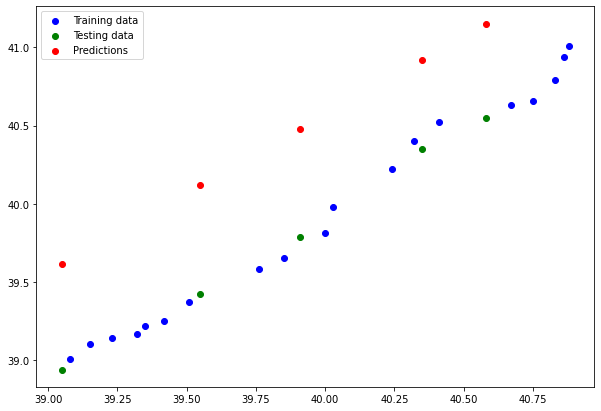

In [ ]:
# Let's visualize model_3 by making a plot of its prediction
y3_pred = MuscleData_model_3.predict(x3_test)
plot_predictions(predictions = y3_pred)

Text(0.5, 0, 'epochs')

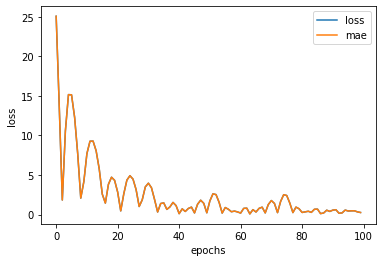

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_3 evaluation metrics
mae_3 = mae(y3_test, y3_pred)
mse_3 = mse(y3_test, y3_pred)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.64710236>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.4213299>)

### MuscleData_model_4

* 2 Layers, Adam optimizer (lr = 0.04), epochs = 600

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.04),
                metrics = ["mae"])

# 3. Fit the model
history = MuscleData_model_4.fit(x3_train, y3_train, epochs = 600)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/600
1/1 [==============================] - 1s 522ms/step - loss: 25.0660 - mae: 25.0660
Epoch 2/600
1/1 [==============================] - 0s 8ms/step - loss: 13.7077 - mae: 13.7077
Epoch 3/600
1/1 [==============================] - 0s 5ms/step - loss: 1.8429 - mae: 1.8429
Epoch 4/600
1/1 [==============================] - 0s 5ms/step - loss: 10.5735 - mae: 10.5735
Epoch 5/600
1/1 [==============================] - 0s 10ms/step - loss: 15.1622 - mae: 15.1622
Epoch 6/600
1/1 [==============================] - 0s 4ms/step - loss: 15.1360 - mae: 15.1360
Epoch 7/600
1/1 [==============================] - 0s 4ms/step - loss: 12.2960 - mae: 12.2960
Epoch 8/600
1/1 [==============================] - 0s 4ms/step - loss: 7.7177 - mae: 7.7177
Epoch 9/600
1/1 [==============================] - 0s 16ms/step - loss: 2.0828 - mae: 2.0828
Epoch 10/600
1/1 [==============================] - 0s 16ms/step - loss: 4.1596 - mae: 4.1596
Epoch 11/600
1/1 [==============================] - 0s 10ms/st

In [ ]:
# Let's check the results of the model on the test dataset
MuscleData_model_4.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 156ms/step - loss: 0.1460 - mae: 0.1460


[0.1459808349609375, 0.1459808349609375]

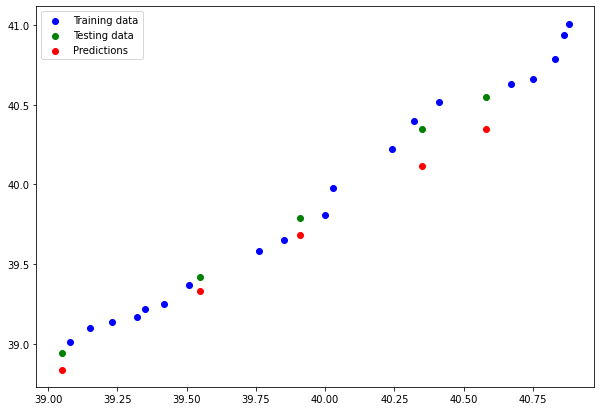

In [ ]:
# Let's visualize model_4 by making a plot of its prediction
y4_pred = MuscleData_model_4.predict(x3_test)
plot_predictions(predictions = y4_pred)

Text(0.5, 0, 'epochs')

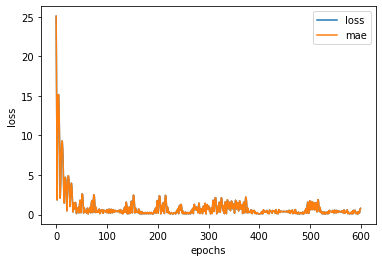

In [ ]:
# Let's plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_4 evaluation metrics
mae_4 = mae(y3_test, y4_pred)
mse_4 = mse(y3_test, y4_pred)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=0.14598083>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.024838736>)

### MuscleData_model_5

* 2 Layers, Adam Optimizer (lr = 0.018), epochs = 2000, patience = 42

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_5 = tf.keras.Sequential([                                                                               
  tf.keras.layers.Dense(10),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_5.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.018),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 42)
history = MuscleData_model_5.fit(x3_train, y3_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 543ms/step - loss: 25.0660 - mae: 25.0660
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 20.0197 - mae: 20.0197
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 14.8677 - mae: 14.8677
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 9.6079 - mae: 9.6079
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 4.2361 - mae: 4.2361
Epoch 6/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.2552 - mae: 1.2552
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 4.2906 - mae: 4.2906
Epoch 8/2000
1/1 [==============================] - 0s 6ms/step - loss: 5.5697 - mae: 5.5697
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 5.5687 - mae: 5.5687
Epoch 10/2000
1/1 [==============================] - 0s 9ms/step - loss: 4.6208 - mae: 4.6208
Epoch 11/2000
1/1 [==============================] - 0s 14

In [ ]:
# Let's check the results of the model on the test dataset
MuscleData_model_5.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 163ms/step - loss: 0.2679 - mae: 0.2679


[0.267904669046402, 0.267904669046402]

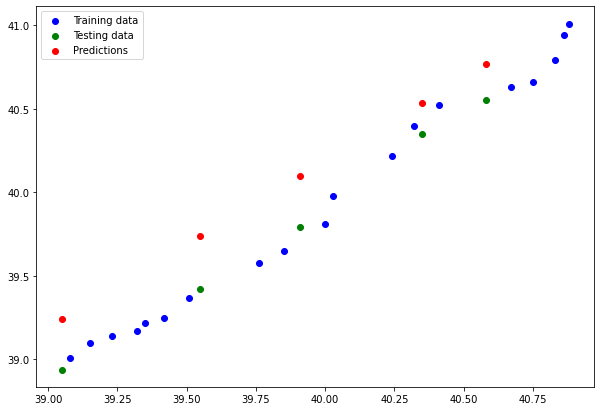

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y5_pred = MuscleData_model_5.predict(x3_test)
plot_predictions(predictions = y5_pred)

Text(0.5, 0, 'epochs')

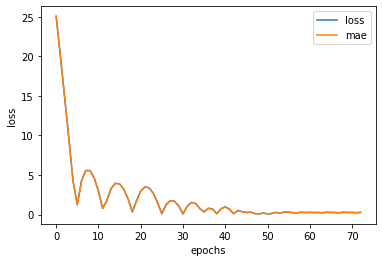

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_5 evaluation metrics
mae_5 = mae(y3_test, y5_pred)
mse_5 = mse(y3_test, y5_pred)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=0.26790315>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.07481201>)

### MuscleData_model_6

* 2 Layers, Adam optimizer (lr = 0.008), epochs = 2000, activation = "relu"

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
MuscleData_model_6 = tf.keras.Sequential([                                         
  tf.keras.layers.Dense(10, activation= "relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
MuscleData_model_6.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = MuscleData_model_6.fit(x3_train, y3_train, epochs = 2000, callbacks = [callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 504ms/step - loss: 13.4385 - mae: 13.4385
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 12.3474 - mae: 12.3474
Epoch 3/2000
1/1 [==============================] - 0s 9ms/step - loss: 11.2348 - mae: 11.2348
Epoch 4/2000
1/1 [==============================] - 0s 14ms/step - loss: 10.1004 - mae: 10.1004
Epoch 5/2000
1/1 [==============================] - 0s 5ms/step - loss: 8.9437 - mae: 8.9437
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 7.7644 - mae: 7.7644
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 6.5621 - mae: 6.5621
Epoch 8/2000
1/1 [==============================] - 0s 17ms/step - loss: 5.3364 - mae: 5.3364
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.0868 - mae: 4.0868
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 2.8129 - mae: 2.8129
Epoch 11/2000
1/1 [==============================] - 0s 7

In [ ]:
# Let's check the results of the model on the test dataset
MuscleData_model_6.evaluate(x3_test, y3_test)

1/1 [==============================] - 0s 243ms/step - loss: 0.0475 - mae: 0.0475


[0.047528840601444244, 0.047528840601444244]

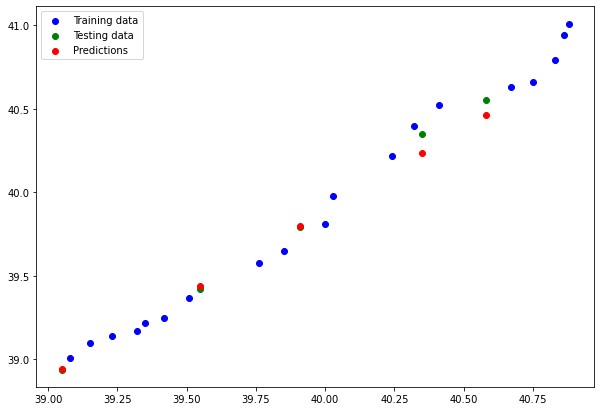

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
y6_pred = MuscleData_model_6.predict(x3_test)
plot_predictions(predictions = y6_pred)

Text(0.5, 0, 'epochs')

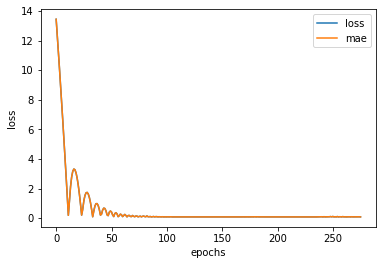

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
# model_6 evaluation metrics
mae_6 = mae(y3_test, y6_pred)
mse_6 = mse(y3_test, y6_pred)
mae_6, mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=0.04752884>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.004356481>)

### Let's compare the MuscleData model's result using a panda DataFrame

In [ ]:
# Here we compare the results from our 6 models using a pandas DataFrame
import pandas as pd

model_results = [["MuscleData_model_1", mae_1.numpy(), mse_1.numpy()],
                 ["MuscleData_model_2", mae_2.numpy(), mse_2.numpy()],
                 ["MuscleData_model_3", mae_3.numpy(), mse_3.numpy()],
                 ["MuscleData_model_4", mae_4.numpy(), mse_4.numpy()],
                 ["MuscleData_model_5", mae_5.numpy(), mse_5.numpy()],
                 ["MuscleData_model_6", mae_6.numpy(), mse_6.numpy()]]

all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

,model,mae,mse
0,MuscleData_model_1,0.754572,0.569577
1,MuscleData_model_2,2.465399,6.086454
2,MuscleData_model_3,0.647102,0.421330
3,MuscleData_model_4,0.145981,0.024839
4,MuscleData_model_5,0.267903,0.074812
5,MuscleData_model_6,0.047529,0.004356


In [ ]:
# MuscleData_model_6 is the most effective model as its mae and mse are the lowest.

### **Preprocessing data (normalization and standardization)**

Why Normalize or Standardize?
> ML algorithms can perform better or converge faster when features are on a relatively similar scale and/or close to normally distrubuted.

**Normalization** - changes the values of numeric columns in the dataset to a *COMMON SCALE*, without distorting differences in the range of values.

> Normalization is also knwon as *scaling* and it converts all values to between 0 and 1 whilst preserving the original distribution.

**Standardization** - removes the mean and divides each value by the standard deviation.

> Standardization is used when you want to transform a *feature* to have close to normal distribution (this reduces the effect of outliers).

TRY BOTH TO SEE WHICH PERFORMS BEST



* The histogram plots below show that each of the features are on different SCALES. This is where we need normalization.

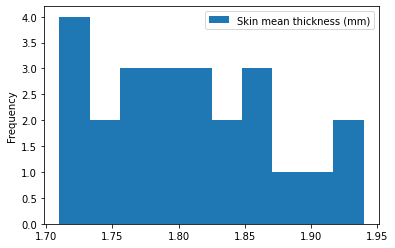

In [ ]:
x1.plot(kind = "hist")

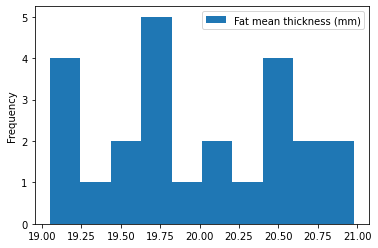

In [ ]:
x2.plot(kind = "hist")

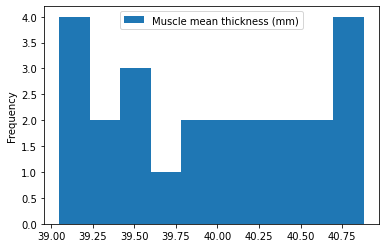

In [ ]:
x3.plot(kind = "hist")

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read dataset dataframe
SkinData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Skin')
FatData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Subcutaneous fat')
MuscleData = pd.read_excel('/content/Training and Testing data.xlsx', sheet_name = 'Muscle')

To prepare our data, we borrow a few classes from Scikit-Learn

**Normalizing SkinData**

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Here we create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Skin mean thickness (mm)"]), # turn all values in these columns between 0 and 1
)

# Here we create the x & y variables for SkinData
x1 = SkinData.drop("Skin cutting force (N)", axis = 1)
y1 = SkinData["Skin cutting force (N)"]

# Here we build our train and test sets for SkinData
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 42)

# Here we fit the column transformer to our training data
ct.fit(x1_train)

# Transform training and test data with normization (MinMaxScaler)
x1_train_normal = ct.transform(x1_train)
x1_test_normal = ct.transform(x1_test)

**Normalizing FatData**

In [ ]:
# Here we create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Fat mean thickness (mm)"]), # turn all values in these columns between 0 and 1
)

# Here we create the x & y variables for SkinData
x1 = FatData.drop("Subcutaneous fat cutting force (N)", axis = 1)
y1 = FatData["Subcutaneous fat cutting force (N)"]

# Here, for FatData, we create the training and test sets with a 80:20 split.
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 42)

# Here we fit the column transformer to our training data
ct.fit(x2_train)

# Transform training and test data with normization (MinMaxScaler)
x2_train_normal = ct.transform(x2_train)
x2_test_normal = ct.transform(x2_test)

**Normalizing MuscleData**

In [ ]:
# Here we create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Muscle mean thickness (mm)"]), # turn all values in these columns between 0 and 1
)

# Here we create the x & y variables for SkinData
x1 = MuscleData.drop("Muscle cutting force (N)", axis = 1)
y1 = MuscleData["Muscle cutting force (N)"]

# Here, for MuscleData, we create the training and test sets with a 80:20 split.
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.2, random_state = 42)

# Here we fit the column transformer to our training data
ct.fit(x3_train)

# Transform training and test data with normization (MinMaxScaler)
x3_train_normal = ct.transform(x3_train)
x3_test_normal = ct.transform(x3_test)

Our data has been **normalized** so now we can build a neural network model to fit our normalized dataset.

### Neural network model with normalized dataset

Normalized Skin data

In [ ]:
# Let's test the normalized dataset with the settings of SkinData_model_5

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
Model_1_Skin = tf.keras.Sequential([                                                                                                               
  tf.keras.layers.Dense(10),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
Model_1_Skin.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.018),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 42)
history = Model_1_Skin.fit(x1_train_normal, y1_train, epochs = 2000, callbacks = [callback]) # What's changed: x1_train_NORMAL

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 0s 331ms/step - loss: 53.6943 - mae: 53.6943
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 53.5605 - mae: 53.5605
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 53.4231 - mae: 53.4231
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 53.2821 - mae: 53.2821
Epoch 5/2000
1/1 [==============================] - 0s 7ms/step - loss: 53.1372 - mae: 53.1372
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 52.9879 - mae: 52.9879
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 52.8336 - mae: 52.8336
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 52.6732 - mae: 52.6732
Epoch 9/2000
1/1 [==============================] - 0s 5ms/step - loss: 52.5058 - mae: 52.5058
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 52.3307 - mae: 52.3307
Epoch 11/2000
1/1 [============================

In [ ]:
# Let's check the results of the model on the test dataset
SkinData_model_1.evaluate(x1_test_normal, y1_test) # What's changed: x1_test_NORMAL

1/1 [==============================] - 0s 34ms/step - loss: 0.1362 - mae: 0.1362


[0.13621369004249573, 0.13621369004249573]

In [ ]:
# Without normalized data: SkinData_model_5
# /1 [==============================] - 0s 95ms/step - loss: 0.0846 - mae: 0.0846

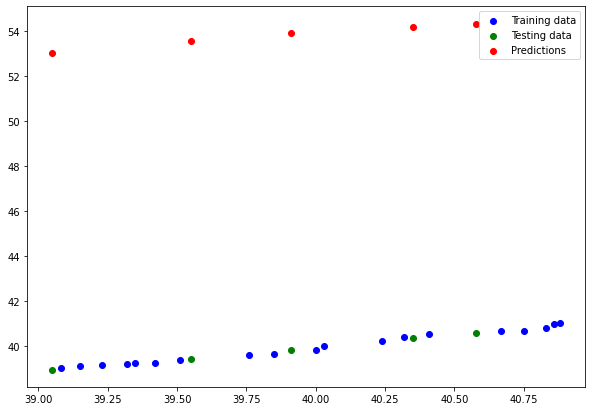

In [ ]:
# Let's visualize model_1 by making a plot of its prediction
pred_y1 = Model_1_Skin.predict(x1_test_normal)
plot_predictions(predictions = pred_y1)

Note on NORMALIZED model:

* The model was less effective when normalized, with a loss of 0.1362 (comapred to 0.0846).

* The normalized model reached a low loss with an epoch = 325, compared to SkinData_model_5 (epoch = 1516)

Normalized Fat data

In [ ]:
# Let's test the normalized dataset with the settings of FatData_model_6

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
Model_1_Fat = tf.keras.Sequential([                                                                                                               
  tf.keras.layers.Dense(10, activation = "relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
Model_1_Fat.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = Model_1_Fat.fit(x2_train_normal, y2_train, epochs = 2000, callbacks = [callback]) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 528ms/step - loss: 1.6366 - mae: 1.6366
Epoch 2/2000
1/1 [==============================] - 0s 17ms/step - loss: 1.6008 - mae: 1.6008
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.5642 - mae: 1.5642
Epoch 4/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.5268 - mae: 1.5268
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.4886 - mae: 1.4886
Epoch 6/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.4496 - mae: 1.4496
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.4097 - mae: 1.4097
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.3691 - mae: 1.3691
Epoch 9/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.3275 - mae: 1.3275
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.2851 - mae: 1.2851
Epoch 11/2000
1/1 [==============================] - 0s 7ms/ste

In [ ]:
# Let's check the results of the model on the test dataset
Model_1_Fat.evaluate(x2_test_normal, y2_test) 

1/1 [==============================] - 0s 196ms/step - loss: 0.0216 - mae: 0.0216


[0.021585583686828613, 0.021585583686828613]

In [ ]:
# Without normalized data: FatData_model_6
# 1/1 [==============================] - 0s 96ms/step - loss: 0.0168 - mae: 0.0168

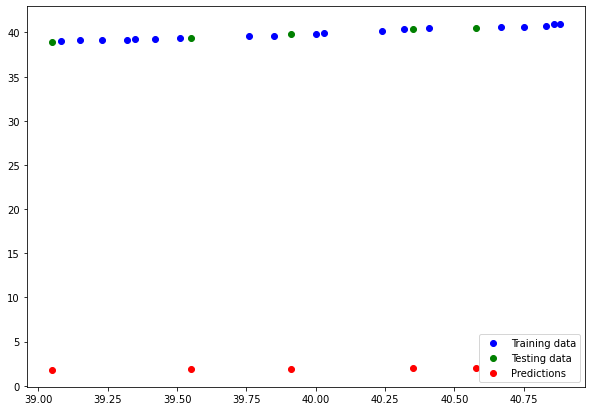

In [ ]:
# Let's visualize model_6 by making a plot of its prediction
pred_y1 = Model_1_Fat.predict(x2_test_normal) 
plot_predictions(predictions = pred_y1)

Note on NORMALIZED model:

* The model was less effective when normalized, with a loss of 0.0216 (comapred to 0.0168).

* The normalized model reached a low loss with an epoch = 239, compared to FatData_model_6 (epoch = 105)

Normalized Muscle Data

In [ ]:
# Let's test the normalized dataset with the settings of FatData_model_6

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
Model_1_Muscle = tf.keras.Sequential([                                                                                                               
  tf.keras.layers.Dense(10, activation = "relu"),                                
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
Model_1_Muscle.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(lr = 0.008),
                metrics = ["mae"])

# 3. Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 40)
history = Model_1_Muscle.fit(x3_train_normal, y3_train, epochs = 2000, callbacks = [callback]) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/2000
1/1 [==============================] - 1s 527ms/step - loss: 39.5865 - mae: 39.5865
Epoch 2/2000
1/1 [==============================] - 0s 6ms/step - loss: 39.5498 - mae: 39.5498
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 39.5123 - mae: 39.5123
Epoch 4/2000
1/1 [==============================] - 0s 6ms/step - loss: 39.4739 - mae: 39.4739
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 39.4348 - mae: 39.4348
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 39.3948 - mae: 39.3948
Epoch 7/2000
1/1 [==============================] - 0s 18ms/step - loss: 39.3540 - mae: 39.3540
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 39.3123 - mae: 39.3123
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 39.2698 - mae: 39.2698
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 39.2263 - mae: 39.2263
Epoch 11/2000
1/1 [===========================

In [ ]:
# Let's check the results of the model on the test dataset
Model_1_Muscle.evaluate(x3_test_normal, y3_test)

1/1 [==============================] - 0s 147ms/step - loss: 0.0315 - mae: 0.0315


[0.03150482103228569, 0.03150482103228569]

In [ ]:
# Without normalized data: MuscleData_model_6
# 1/1 [==============================] - 0s 90ms/step - loss: 0.0475 - mae: 0.0475

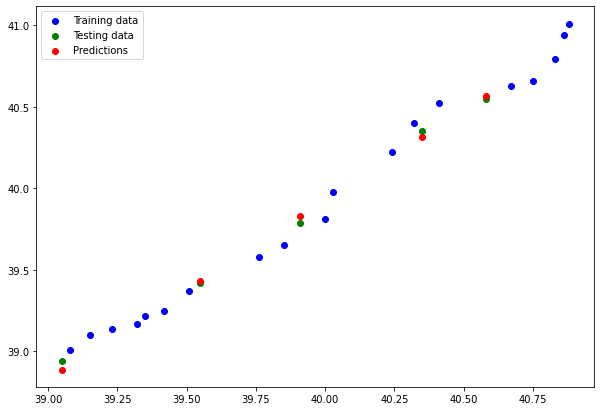

In [ ]:
# Let's visualize model_6 by making a plot of its prediction
pred_y1 = Model_1_Muscle.predict(x3_test_normal) 
plot_predictions(predictions = pred_y1)

Note on NORMALIZED model:

* The model was more effective when normalized, with a loss of 0.0315 (comapred to 0.0475).

* The normalized model reached a low loss with an epoch = 613, compared to MuscleData_model_6 (epoch = 276)

### Let's test the trained models on the unlabelled data